In [2]:
import nibabel as nb 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Functional_Fusion.dataset import decompose_pattern_into_group_indiv_noise
import Functional_Fusion.util as ut

from scripts import decomposing_variances
from scripts import make_atlas
#from scripts import bold_normalization 
import Functional_Fusion.dataset as ds
import Functional_Fusion.atlas_map as am

/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_53295/3274640356.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [72]:
#Pontine7T variance decomposition + stuffing it into .tsv file 

pt_base ='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T'

flat_data = decomposing_variances.get_structure_data(structure='cereb_gray', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group')

cond_vec = np.tile(np.arange(1,11),16)

part_vec = np.repeat(np.arange(1,17), 10)

flat_data = ds.remove_baseline(flat_data[0],part_vec)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

no_nans = np.nan_to_num(tensor_4d)

print(no_nans.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans, criterion='subject_wise')

print(var_decomp)

#normalization 

var_norm = np.zeros((16,3))

for i in range(16): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

#tsv file 

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_pon7T = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{pt_base}/participants.tsv', sep = '\t')

subj = [i for i, good_value in zip(T.participant_id, T.good) if good_value == 1]

df_pon7T["subj_id"] = subj  
df_pon7T["dataset"] = "Pontine7T"  
df_pon7T["atlas"] = "MNISymCereb1"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_pon7T.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)



(16, 16, 10, 146318)
[[0.00050247 0.00460525 0.07499516]
 [0.00033297 0.00119271 0.06001823]
 [0.00047506 0.0018363  0.05985942]
 [0.00044695 0.00292117 0.08840355]
 [0.00043478 0.00145586 0.08137659]
 [0.00040855 0.0014051  0.05744854]
 [0.00032384 0.00109976 0.06214936]
 [0.00039445 0.00130696 0.07227868]
 [0.00051135 0.0020607  0.06139746]
 [0.00050682 0.0023211  0.06904361]
 [0.00061869 0.0038028  0.07428325]
 [0.00093264 0.01032583 0.10468778]
 [0.00062741 0.00367852 0.05979353]
 [0.00062106 0.00273307 0.0500226 ]
 [0.00051431 0.00190038 0.07760829]
 [0.00061324 0.0020199  0.06144687]]
[[0.00627276 0.05749171 0.93623553]
 [0.00541035 0.01937985 0.9752098 ]
 [0.00764127 0.02953635 0.96282238]
 [0.00487019 0.03183082 0.96329899]
 [0.00522147 0.01748415 0.97729439]
 [0.00689392 0.02370987 0.96939622]
 [0.00509403 0.01729917 0.9776068 ]
 [0.00533187 0.01766641 0.97700172]
 [0.0079937  0.03221382 0.95979247]
 [0.00705175 0.03229507 0.96065318]
 [0.00786095 0.04831728 0.94382177]
 [0.00

In [57]:
#extracting language data 

base_dir = ut.get_base_dir()

Y,infoY,dataset_objY = ds.get_dataset(base_dir,
        dataset='Language',
        atlas='MNISymCereb1',
        sess='ses-localizer_cond_fm',
        type='CondRun')


In [152]:
X,infoX,dataset_objX = ds.get_dataset(base_dir,
        dataset='MDTB',
        atlas='MNISymDentate1',
        sess='ses-s2',
        type='CondRun')

In [153]:
print(X.shape)

(24, 512, 3934)


In [74]:
#Language variance decomposition, shape is (17,18,8,3934)

lang_data = Y

cond_vec = np.tile(np.arange(1,19),8)

part_vec = np.repeat(np.arange(1,9), 18)

lang_data = ds.remove_baseline(lang_data, part_vec)

tensor_4d = decomposing_variances.flat2ndarray(lang_data, cond_vec, part_vec)

no_nans_lang = np.nan_to_num(tensor_4d)

#print(dentate_no_nans_lang.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans_lang, criterion='subject_wise')

var_norm = np.zeros((17,3))

for i in range(17): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/Language'

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_lang = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_lang["subj_id"] = subj  
df_lang["dataset"] = "Language"  
df_lang["atlas"] = "MNISymCereb1"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_lang.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)

[[ 0.01318971  0.04268249  0.9441278 ]
 [ 0.01603189  0.11894035  0.86502775]
 [ 0.00349963 -0.00812274  1.00462311]
 [ 0.01708422  0.06207334  0.92084244]
 [ 0.01877979  0.06700493  0.91421528]
 [ 0.02705919  0.10560496  0.86733585]
 [ 0.02077971  0.11470686  0.86451343]
 [ 0.01554505  0.03185068  0.95260427]
 [ 0.01509385  0.06634628  0.91855987]
 [ 0.02207481  0.07787199  0.9000532 ]
 [ 0.01858371  0.05967591  0.92174037]
 [ 0.01566221  0.07751317  0.90682461]
 [ 0.01915958  0.07327389  0.90756654]
 [ 0.01912652  0.05652992  0.92434356]
 [ 0.02900541  0.09862285  0.87237174]
 [ 0.01802265  0.05710768  0.92486966]
 [ 0.02188171  0.09325725  0.88486104]]


In [154]:
#mdtb variance decomposition (24,29,16,3934) for ses1

mdtb_data = X

cond_vec = np.tile(np.arange(1,30),16)

part_vec = np.repeat(np.arange(1,17), 29)

tensor_4d = decomposing_variances.flat2ndarray(mdtb_data, cond_vec, part_vec)

no_nans_mdtb = np.nan_to_num(tensor_4d)

print(no_nans_mdtb.shape)

var_decomp= decompose_pattern_into_group_indiv_noise(no_nans_mdtb, criterion='subject_wise')

var_norm = np.zeros((24,3))

for i in range(24): #number of rows 
    row_sum_d = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum_d

print(var_norm[0][0]+var_norm[0][1]+var_norm[0][2])

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/MDTB'

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_mdtb = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_mdtb["subj_id"] = subj  
df_mdtb["dataset"] = "MDTB_ses2"  
df_mdtb["atlas"] = "MNISymDentate1"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_mdtb.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)


(24, 16, 29, 3934)
1.0
[[ 3.76411248e-04 -2.25260048e-03  1.00187619e+00]
 [ 2.05571876e-04 -3.75232246e-03  1.00354675e+00]
 [ 2.87980720e-04  1.22964909e-03  9.98482370e-01]
 [ 1.82563697e-04  2.31713486e-03  9.97500301e-01]
 [-3.26662225e-04  2.93474334e-03  9.97391919e-01]
 [ 4.38151461e-04 -5.10986504e-05  9.99612947e-01]
 [ 1.85470045e-04 -4.32275214e-04  1.00024681e+00]
 [ 1.81593219e-04 -4.44192473e-03  1.00426033e+00]
 [-1.35924411e-04  3.18527224e-03  9.96950652e-01]
 [ 3.66468429e-04 -2.73870569e-03  1.00237224e+00]
 [ 5.39938438e-04 -4.47394019e-03  1.00393400e+00]
 [-7.23340587e-05  1.65637071e-03  9.98415963e-01]
 [ 2.64016283e-04 -2.54372074e-03  1.00227970e+00]
 [ 3.58153258e-04 -2.45527844e-03  1.00209713e+00]
 [ 1.31106132e-04 -1.62619811e-03  1.00149509e+00]
 [-4.80970652e-04  4.27319186e-04  1.00005365e+00]
 [ 2.95871449e-04 -3.11796185e-03  1.00282209e+00]
 [ 3.47389407e-04 -1.85964558e-03  1.00151226e+00]
 [-3.33578616e-04 -2.12380072e-03  1.00245738e+00]
 [ 1.911

In [72]:
#variance decomposition random data

#red nucleus: 900 voxels 
#dentate: 3934 voxels
#thalamus: 25640 voxels 
#olive: 1448 voxels 
#pontine: 11239 voxels 
#cerebellum: 146318 voxels 

#pontine7T: 16,10,16,
#language: 17,18,8 

random_data = np.random.randn(17,18,8,146318)  # Normally distributed values


var_decomp= decompose_pattern_into_group_indiv_noise(random_data, criterion='subject_wise')

print(var_decomp)

#normalization 

var_norm = np.zeros((17,3))

for i in range(17): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

tsv_file = pd.read_csv("var_decomp_ince.tsv", sep="\t")

df_rand = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])


df_rand["subj_id"] = "RAND"  
df_rand["dataset"] = "Language"  
df_rand["atlas"] = "RAND_Cerebellum"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_rand.to_csv("var_decomp_ince.tsv", sep="\t", mode='a', index=False, header=False)

[[-4.19991217e-06  6.72246776e-05  9.99561350e-01]
 [ 1.63991342e-05  4.30978612e-05  9.99359377e-01]
 [-1.31372302e-05  4.52365563e-05  1.00028322e+00]
 [ 1.04556273e-06  6.76134458e-05  9.99363318e-01]
 [ 5.75118521e-06 -3.51877986e-05  1.00018458e+00]
 [-3.32224984e-07  3.18042204e-05  1.00001497e+00]
 [-1.76425518e-05 -1.27880783e-05  9.99905758e-01]
 [ 2.04687945e-05 -7.50455712e-05  1.00021441e+00]
 [-9.02188976e-06 -4.70249718e-05  1.00067214e+00]
 [-2.95578456e-06  2.67108629e-05  9.99855662e-01]
 [ 3.39684659e-06 -9.20859626e-06  9.99845407e-01]
 [ 7.69780731e-06 -2.95373991e-05  1.00010063e+00]
 [-2.60822703e-06 -3.86598982e-05  1.00034261e+00]
 [ 1.53786457e-05 -5.90315273e-05  9.99763550e-01]
 [ 3.02502894e-06 -1.15521075e-04  9.99980835e-01]
 [ 1.50260000e-05  1.10527876e-04  1.00013267e+00]
 [-1.69123570e-05  9.01414101e-05  1.00035210e+00]]
[[-4.20149036e-06  6.72499384e-05  9.99936952e-01]
 [ 1.64086697e-05  4.31229210e-05  9.99940468e-01]
 [-1.31330891e-05  4.52222967e

In [4]:
D = pd.read_csv('var_decomp_ince.tsv',sep='\t')
D['within']=D.group+D.individual
# Rearrange dataframe into long format for easier plotting
T= D.melt(id_vars=['dataset','atlas','subj_id'],value_vars=['group','within'],var_name='vartype',value_name='variance')



In [5]:
# Set Figure style to talk on black background

rc = {'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}
sns.set_style(rc=rc)

Text(0.5, 1.0, 'Var_decomp cereb_gray')

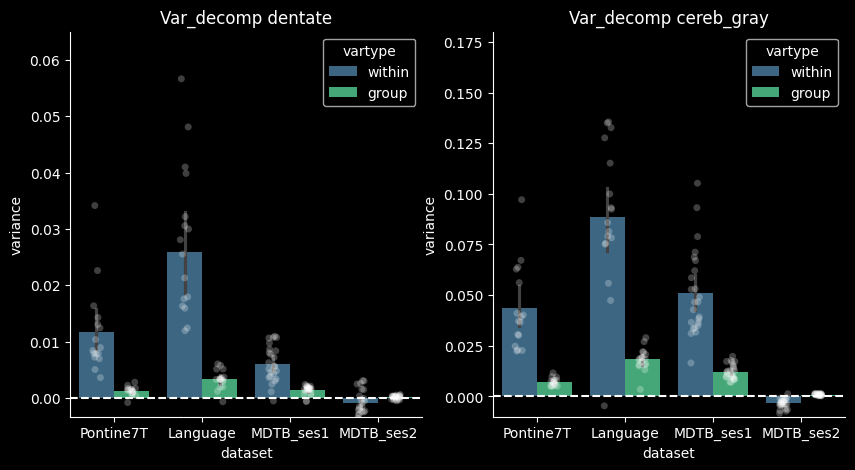

In [6]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymDentate1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language', 'MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.065)
ax.set_title("Var_decomp dentate")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymCereb1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language', 'MDTB_ses1', 'MDTB_ses2'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.18)
ax.set_title("Var_decomp cereb_gray")


#recall that the height of the bars is the MEAN of the subject group + individual values in the .tsv file


Text(0.5, 1.0, 'Var_decomp rednucleus')

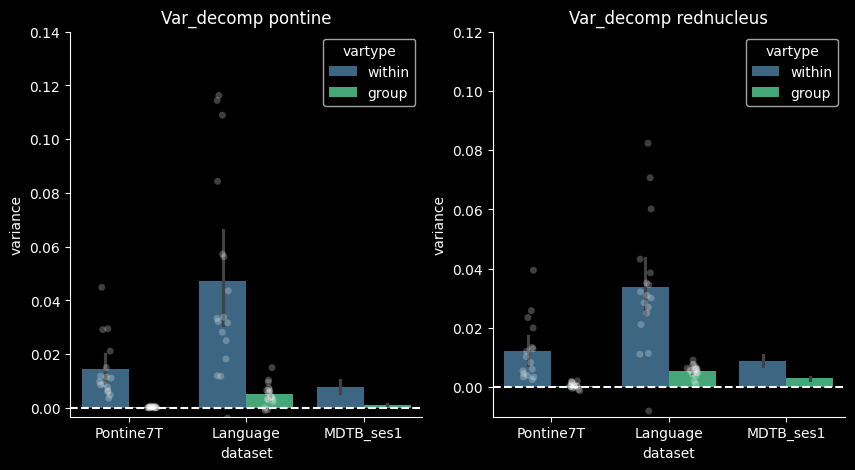

In [169]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymPontine1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.14)
ax.set_title("Var_decomp pontine")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymRedNucleus1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.12)
ax.set_title("Var_decomp rednucleus")

Text(0.5, 1.0, 'Var_decomp thalamus')

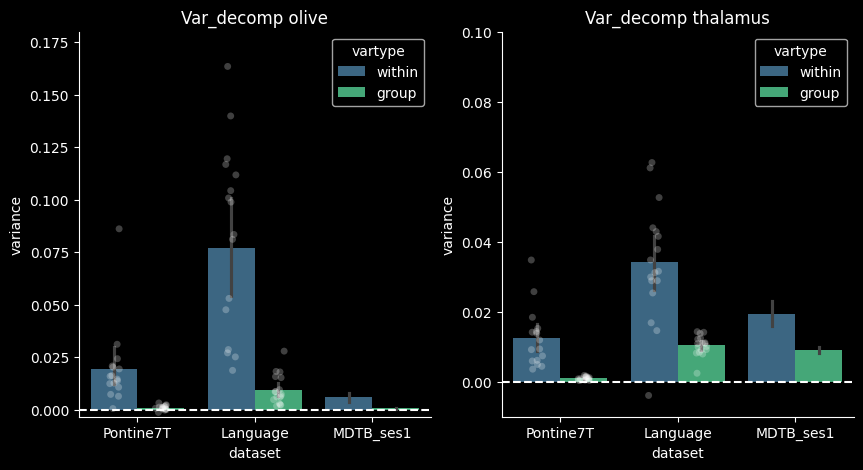

In [168]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymOlive1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.18)
ax.set_title("Var_decomp olive")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymThalamus1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language','MDTB_ses1'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.01,0.1)
ax.set_title("Var_decomp thalamus")



Text(0.5, 1.0, 'Var_decomp pontine')

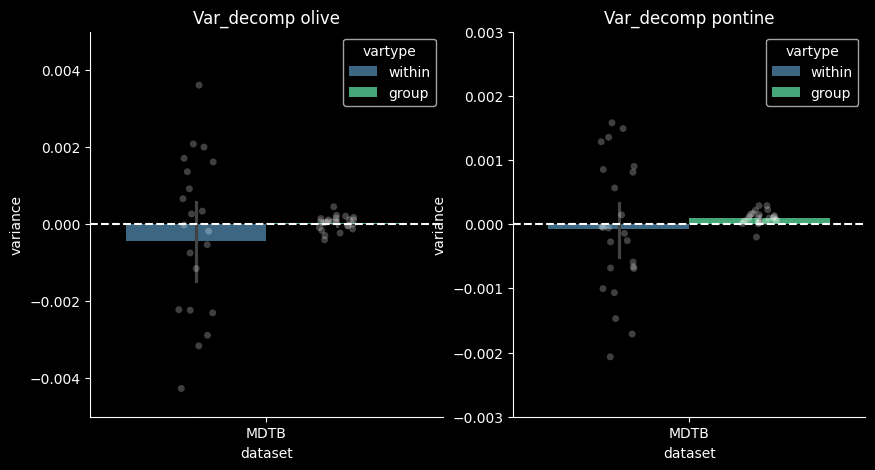

In [30]:

pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymOlive1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
plt.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.005,0.005)
ax.set_title("Var_decomp olive")

plt.subplot(1,2,2)
X = T[T.atlas=='MNISymPontine1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['MDTB'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.003,0.003)
ax.set_title("Var_decomp pontine")





Text(0.5, 1.0, 'Var_decomp random data, cerebellar grey')

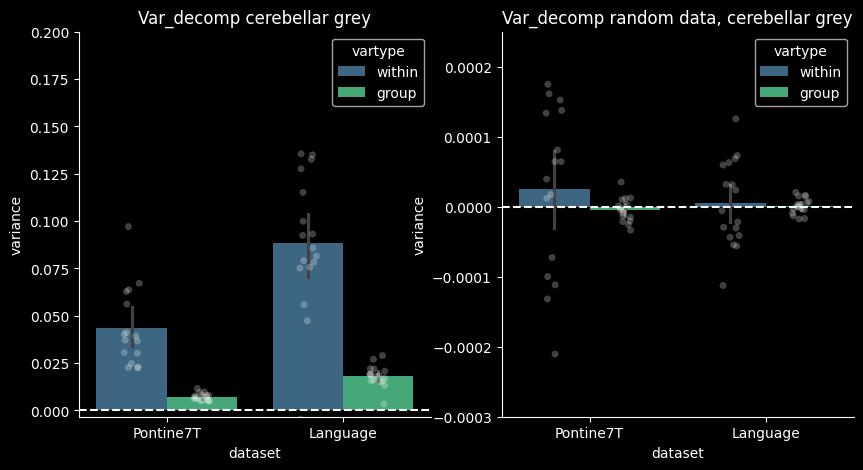

In [118]:
pal = [[1,1,1],[1,1,1]]
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
X = T[T.atlas=='MNISymCereb1']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0033,0.2)
ax.set_title("Var_decomp cerebellar grey")

plt.subplot(1,2,2)
X = T[T.atlas=='RAND_Cerebellum']
ax=sns.barplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette='viridis')
sns.stripplot(data=X,x='dataset',y='variance',hue='vartype',order=['Pontine7T','Language'],hue_order=['within','group'],palette=pal, alpha=0.25,jitter=0.1,dodge=True,legend=False)
ax.axhline(0,color='white',linestyle='--')
ax.set_ylim(-0.0003,0.00025)
#ax.set_ylim(-0.0033,0.2)
ax.set_title("Var_decomp random data, cerebellar grey")
